In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.layers import Dense, Input, Flatten, Dropout, SimpleRNN, TextVectorization, Embedding
from keras.models import Sequential, Model
from sklearn.model_selection import train_test_split

In [2]:
path = 'D:\Лабы 3 курс\МНСиРО\Lab5\spam.csv'
df = pd.read_csv(path, on_bad_lines="skip", encoding="ISO-8859-1")
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["label", "sms"]
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
num_labels = []
for label in df['label']:
    if label == 'ham':
        num_labels.append(0)
    else:
        num_labels.append(1)

y_full = np.array(num_labels)
y_full = to_categorical(y_full, 2)
print(y_full)

[[1. 0.]
 [1. 0.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [5]:
MAX_TOKENS_NUM = 5000
MAX_SEQUENCE_LEN = 40
EMBEDDING_DIMS = 100

vectorize_layer = TextVectorization(
  max_tokens=MAX_TOKENS_NUM,
  output_mode='int',
  output_sequence_length=MAX_SEQUENCE_LEN)
vectorize_layer.adapt(df['sms'])

In [6]:
x_full = np.array(df['sms'])

In [7]:
(x_train, x_test, y_train, y_test) = train_test_split(x_full, y_full, test_size=0.2, random_state=42)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457, 2)
(1115, 2)


In [9]:
model = Sequential()
model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)
model.add(Embedding(MAX_TOKENS_NUM + 1, EMBEDDING_DIMS))
model.add(SimpleRNN(64, activation = 'ReLU'))
# model.add(Flatten())
model.add(Dense(2, activation = 'ReLU'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 40)               0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 40, 100)           500100    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                10560     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 510,790
Trainable params: 510,790
Non-trainable params: 0
_________________________________________________________________


In [10]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss='MSE', optimizer=optimizer, metrics = ['accuracy'])

In [11]:
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_split=0.2, verbose=1)

Epoch 1/25
56/56 [==============================] - 3s 22ms/step - loss: 0.4880 - accuracy: 0.1428 - val_loss: 0.4251 - val_accuracy: 0.1570
Epoch 2/25
56/56 [==============================] - 1s 16ms/step - loss: 0.1881 - accuracy: 0.8533 - val_loss: 0.1236 - val_accuracy: 0.8621
Epoch 3/25
56/56 [==============================] - 1s 16ms/step - loss: 0.1186 - accuracy: 0.8670 - val_loss: 0.1211 - val_accuracy: 0.8621
Epoch 4/25
56/56 [==============================] - 1s 16ms/step - loss: 0.1139 - accuracy: 0.8670 - val_loss: 0.1155 - val_accuracy: 0.8621
Epoch 5/25
56/56 [==============================] - 1s 16ms/step - loss: 0.1063 - accuracy: 0.8670 - val_loss: 0.1105 - val_accuracy: 0.8621
Epoch 6/25
56/56 [==============================] - 1s 16ms/step - loss: 0.0907 - accuracy: 0.8676 - val_loss: 0.0845 - val_accuracy: 0.8700
Epoch 7/25
56/56 [==============================] - 1s 16ms/step - loss: 0.0580 - accuracy: 0.9259 - val_loss: 0.0526 - val_accuracy: 0.9462
Epoch 8/25
56

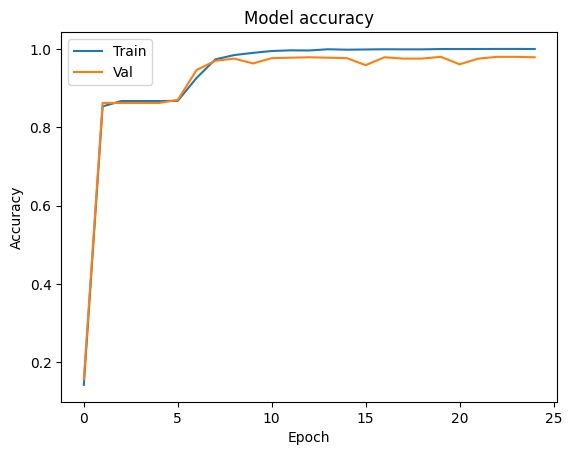

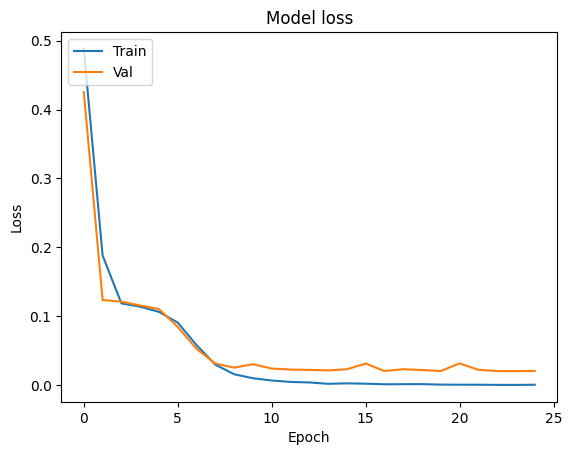

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [13]:
model.evaluate(x_test, y_test)

35/35 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9704


[0.02531970664858818, 0.9704036116600037]

In [14]:
y_pred = model.predict(x_test)

35/35 [==============================] - 0s 3ms/step


In [15]:
pred = model.predict(np.array(["hello guys! how is the weather in your area?"]))
print(pred)
print(['ham','spam'][np.argmax(pred)])

1/1 [==============================] - 0s 28ms/step
[[1.0026773 0.       ]]
ham
